# Taller de Futbol Analytics

La idea de este taller es bla bla ... queremos que se lleven bla bla...

In [1]:
# Primero importamos unas librerías de Python que vamos a usar a lo largo del notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from adjustText import adjust_text

In [2]:
# Obtenemos los datos desde el archivo df_reducido.csv
df = pd.read_csv("datasets_procesados/df_reducido.csv")

In [3]:
# Podemos obtener una primera visualización de los datos viendo sus primeras 5 filas con el comando head()
display(df.head())

,Jugador,Equipo,Competición,Posición,Edad,Partidos,Minutos,Goles,Asistencias,xG,...,Bloqueos,TarjetasAmarillas,TarjetasRojas,Goles_Asistencias,xG_xAG,Equiv_90min,EntradasGanadas,AsistDesdeCruzados,Tiros,TirosAlArco
0,Erling Haaland,Manchester City,Premier League,FW,24-259,28,2480,21,3,20.8,...,11,2,0,24,0.86,27.6,5,1,99,54
1,Jude Bellingham,Real Madrid,La Liga,MF,21-281,24,1983,8,7,8.9,...,28,3,1,15,0.56,22.0,28,0,44,16
2,Kylian Mbappé,Real Madrid,La Liga,FW,26-107,28,2420,22,3,20.0,...,3,3,0,25,0.98,26.9,5,2,121,62
3,Bukayo Saka,Arsenal,Premier League,"FW,MF",23-213,18,1338,6,10,5.2,...,16,3,0,16,0.75,14.9,13,10,48,18
4,Jamal Musiala,Bayern Munich,Bundesliga,MF,22-039,25,1798,12,2,9.3,...,30,3,0,14,0.69,20.0,21,0,68,31


Fijense que en los datos que tenemos que tienen solo numeros, hay menos columnas (porque nos quedamos solo con las que tienen números)

In [4]:
# Con este comando podemos ver las columnas (o sea, toda la información que tenemos de cada jugador)
print(list(df.columns))

['Jugador', 'Equipo', 'Competición', 'Posición', 'Edad', 'Partidos', 'Minutos', 'Goles', 'Asistencias', 'xG', 'xAG', 'npxG', 'ValorMercado', 'PasesCompletados', 'IntentosPase', 'PctPasesCompletados', 'DistanciaTotalPases', 'DistanciaProgresiva', 'PasesClave', 'Entradas', 'Intercepciones', 'Bloqueos', 'TarjetasAmarillas', 'TarjetasRojas', 'Goles_Asistencias', 'xG_xAG', 'Equiv_90min', 'EntradasGanadas', 'AsistDesdeCruzados', 'Tiros', 'TirosAlArco']


También podemos usar gráficos para ver la información de manera más comprimida. Por ejemplo si queremos ver los goles y las asistencias de los jugadores, los podemos poner en un gráfico:

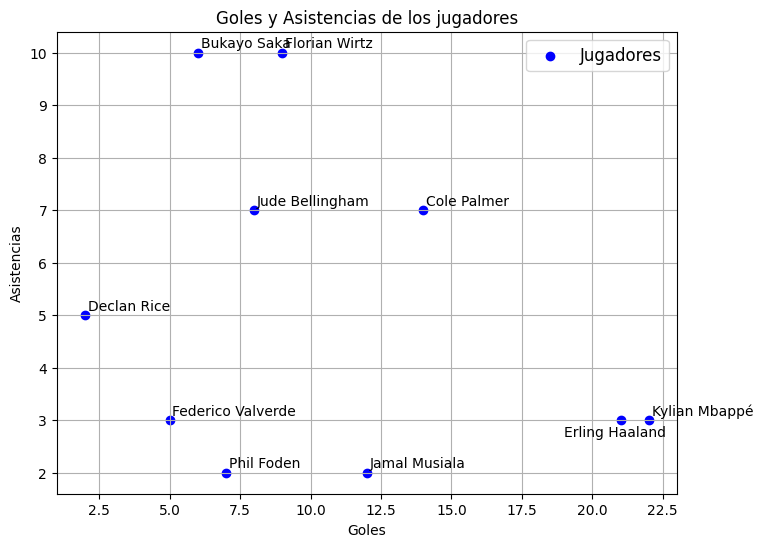

In [5]:
df_grafico=df[:10]
plt.figure(figsize=(8, 6))
plt.scatter(df_grafico['Goles'], df_grafico['Asistencias'], label="Jugadores", color="blue")
plt.text(df_grafico['Goles'][0]-2, df_grafico['Asistencias'][0]-0.3, df["Jugador"][0])
for i in range(1,10):
    plt.text(df_grafico['Goles'][i]+0.1, df_grafico['Asistencias'][i]+0.1, df["Jugador"][i])
plt.xlabel('Goles')
plt.ylabel('Asistencias')
plt.title('Goles y Asistencias de los jugadores')
plt.grid()
plt.legend(fontsize=12)
plt.show()

Se pone divertido cuando podemos ver un monton de estos datos. Podemos buscar relaciones entre las estadísticas de los futbolistas.

Elijamos dos columnas y veamos la relación:

In [6]:
# Acá capaz podrían jugar un poco con esto
primera_columna = 'PasesCompletados' # Pases completados cada 90 minutos
segunda_columna = 'Goles' # Tiros totales cada 90 minutos

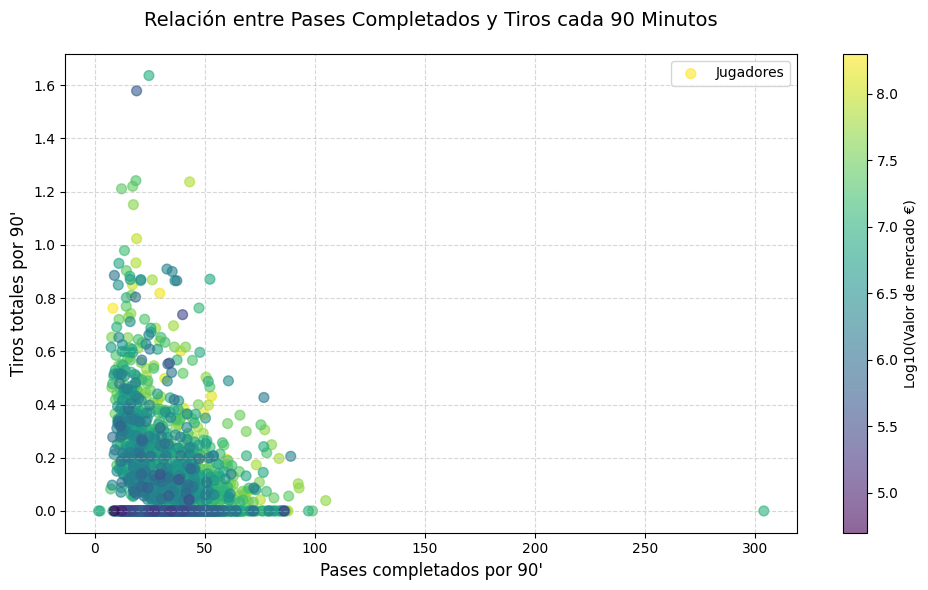

In [7]:
df_grafico = df[df["Minutos"] > 90] # Para el gráfico nos quedamos con los futbolistas que hayan jugado al menos 90 minutos

# Configuración de estilo
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Normalizar las métricas por 90 minutos
pases_90 = 90 * df_grafico[primera_columna] / df_grafico['Minutos'] # Cuantos pases hizo cada 90 minutos
tiros_90 = 90 * df_grafico[segunda_columna] / df_grafico['Minutos'] # Cuantos tiros al arco hizo cada 90 minutos

plt.scatter(
    x=pases_90,
    y=tiros_90,
    c=np.log10(df_grafico['ValorMercado']),  # Escala logarítmica base 10
    cmap='viridis',
    alpha=0.6,
    s=50
)
cbar = plt.colorbar()
cbar.set_label('Log10(Valor de mercado €)', fontsize=10)

# Títulos y etiquetas
plt.title('Relación entre Pases Completados y Tiros cada 90 Minutos', fontsize=14, pad=20)
plt.xlabel('Pases completados por 90\'', fontsize=12)
plt.ylabel('Tiros totales por 90\'', fontsize=12)

# Grid y leyenda
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Jugadores'], loc='upper right')

# Mostrar gráfico
plt.tight_layout()  # Evita cortes en etiquetas
plt.show()

Estuve experimentando con estas cosas. Pero habría que repensar varias cosas, como ponerles nombres más descriptivos a las columnas, hacer gráficos más interesantes, etc

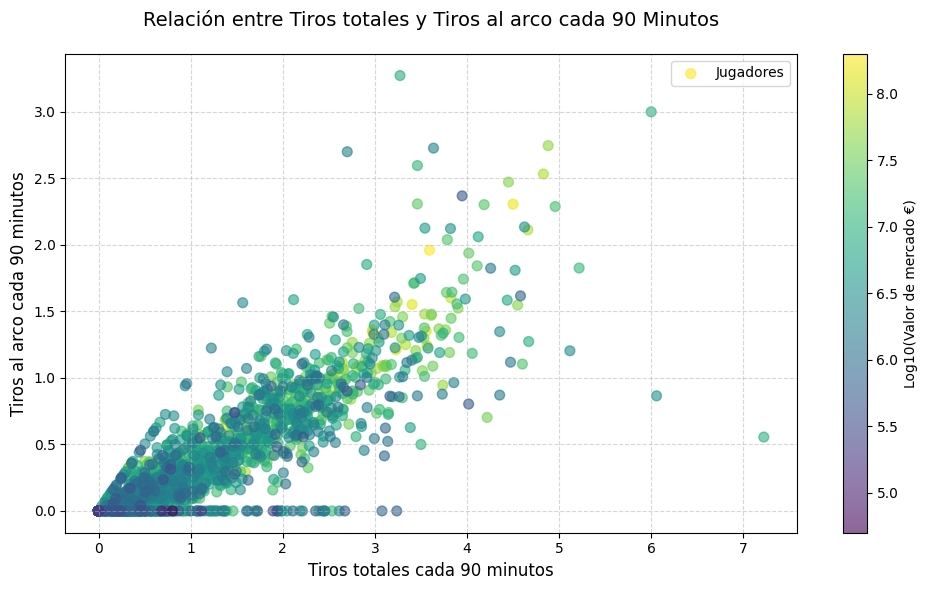

In [12]:
# Configuración de estilo
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Normalizar las métricas por 90 minutos
tiros_al_arco_90 = 90 * df_grafico['TirosAlArco'] / df_grafico['Minutos'] # Tiros al arco cada 90 minutos
tiros_90 = 90 * df_grafico['Tiros'] / df_grafico['Minutos']               # Tiros cada 90 minutos

plt.scatter(
    x=tiros_90,
    y=tiros_al_arco_90,
    c=np.log10(df_grafico['ValorMercado']),  # Escala logarítmica base 10
    cmap='viridis',
    alpha=0.6,
    s=50
)
cbar = plt.colorbar()
cbar.set_label('Log10(Valor de mercado €)', fontsize=10)

# Títulos y etiquetas
plt.title('Relación entre Tiros totales y Tiros al arco cada 90 Minutos', fontsize=14, pad=20)
plt.xlabel('Tiros totales cada 90 minutos', fontsize=12)
plt.ylabel('Tiros al arco cada 90 minutos', fontsize=12)

# Grid y leyenda
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Jugadores'], loc='upper right')

# Mostrar gráfico
plt.tight_layout()  # Evita cortes en etiquetas
plt.show()

Podríamos también experimentar cómo afecta la estadística esta del xG a los goles de un jugaador, veamos qué onda...

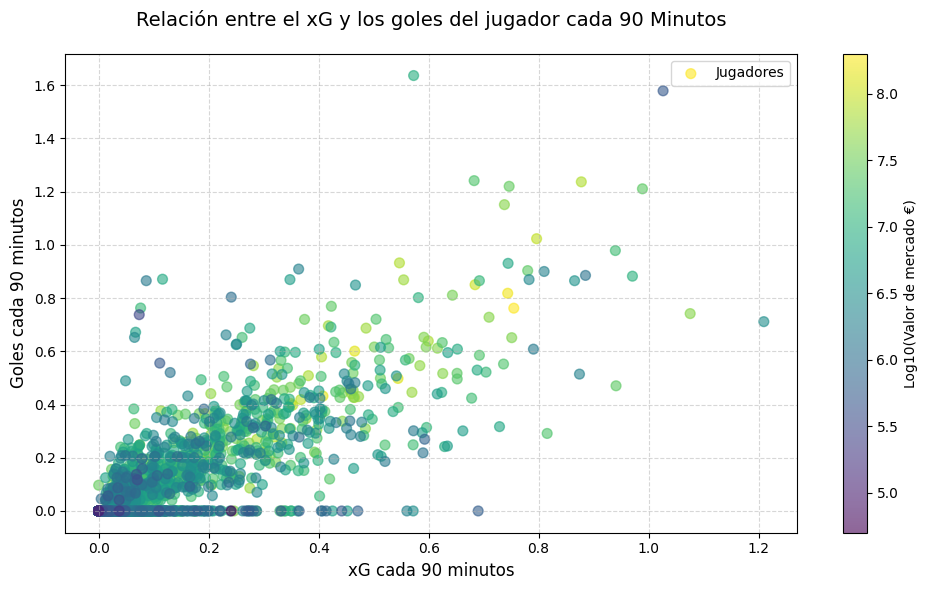

In [22]:
# Configuración de estilo
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Normalizar las métricas por 90 minutos
xG_90 = 90 * df_grafico['xG'] / df_grafico['Minutos']          # xG del jugador cada 90 minutos
goles_90 = 90 * df_grafico['Goles'] / df_grafico['Minutos']    # Goles cada 90 minutos

plt.scatter(
    x=xG_90,
    y=goles_90,
    c=np.log10(df_grafico['ValorMercado']),  # Escala logarítmica base 10
    cmap='viridis',
    alpha=0.6,
    s=50
)
cbar = plt.colorbar()
cbar.set_label('Log10(Valor de mercado €)', fontsize=10)

# Títulos y etiquetas
plt.title('Relación entre el xG y los goles del jugador cada 90 Minutos', fontsize=14, pad=20)
plt.xlabel('xG cada 90 minutos', fontsize=12)
plt.ylabel('Goles cada 90 minutos', fontsize=12)

# Grid y leyenda
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Jugadores'], loc='upper right')

# Mostrar gráfico
plt.tight_layout()  # Evita cortes en etiquetas
plt.show()

In [21]:
df_grafico[(goles_90>1.4) & (xG_90>1.0)]

,Jugador,Equipo,Competición,Posición,Edad,Partidos,Minutos,Goles,Asistencias,xG,...,Bloqueos,TarjetasAmarillas,TarjetasRojas,Goles_Asistencias,xG_xAG,Equiv_90min,EntradasGanadas,AsistDesdeCruzados,Tiros,TirosAlArco
2006,Noah Edjouma,Toulouse,Ligue 1,"MF,FW",19-184,7,114,2,0,1.3,...,1,0,0,2,1.01,1.3,2,1,5,3
